In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
# from tensorflow.applications import VGG16
import sklearn
from sklearn import datasets, svm, metrics
# import keras.backend as K
from sklearn.metrics import roc_auc_score
from sklearn import metrics


In [29]:
vgg_conv = tf.keras.applications.VGG16(weights="imagenet",input_shape = (224,224,3), include_top=True, classes=1000)
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.01, decay=0.0, nesterov=True)
#opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.90)
vgg_conv.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])  #'auc'

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x0000016B45420160>>
Traceback (most recent call last):
  File "C:\Users\s147057\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\client\session.py", line 1398, in __del__
    self._session._session, self._handle, status)
  File "C:\Users\s147057\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\errors_impl.py", line 519, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 1559813029960


In [139]:
 def load_image(path):
    img_array = cv2.imread(path, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array,(224, 224))
    plt.imshow(new_array)
    return new_array 

In [11]:
img_array = cv2.imread('smartdeals.PNG', cv2.IMREAD_COLOR)


numpy.ndarray

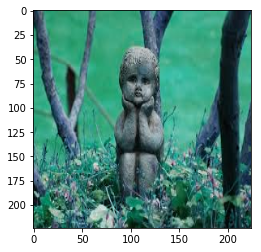

In [140]:
a = load_image("download_test.jpg")

In [15]:
new_array = cv2.resize(img_array,(224, 224))
new_array

array([[[71, 25, 24],
        [71, 25, 24],
        [70, 24, 24],
        ...,
        [40, 10, 10],
        [39, 10,  8],
        [39,  9,  9]],

       [[71, 25, 24],
        [70, 25, 24],
        [71, 25, 24],
        ...,
        [40, 10,  8],
        [40,  9,  9],
        [39,  9,  9]],

       [[71, 25, 24],
        [71, 25, 24],
        [71, 25, 24],
        ...,
        [40, 10, 10],
        [41,  8,  9],
        [39,  9,  8]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [46, 46, 46],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]]], dtype=uint8)

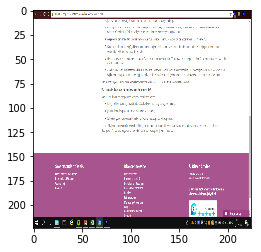

In [13]:
plt.imshow(new_array)

In [17]:
model = vgg_conv

In [59]:

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs[3])
activations = activation_model.predict(new_array.reshape(1,224,224,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1


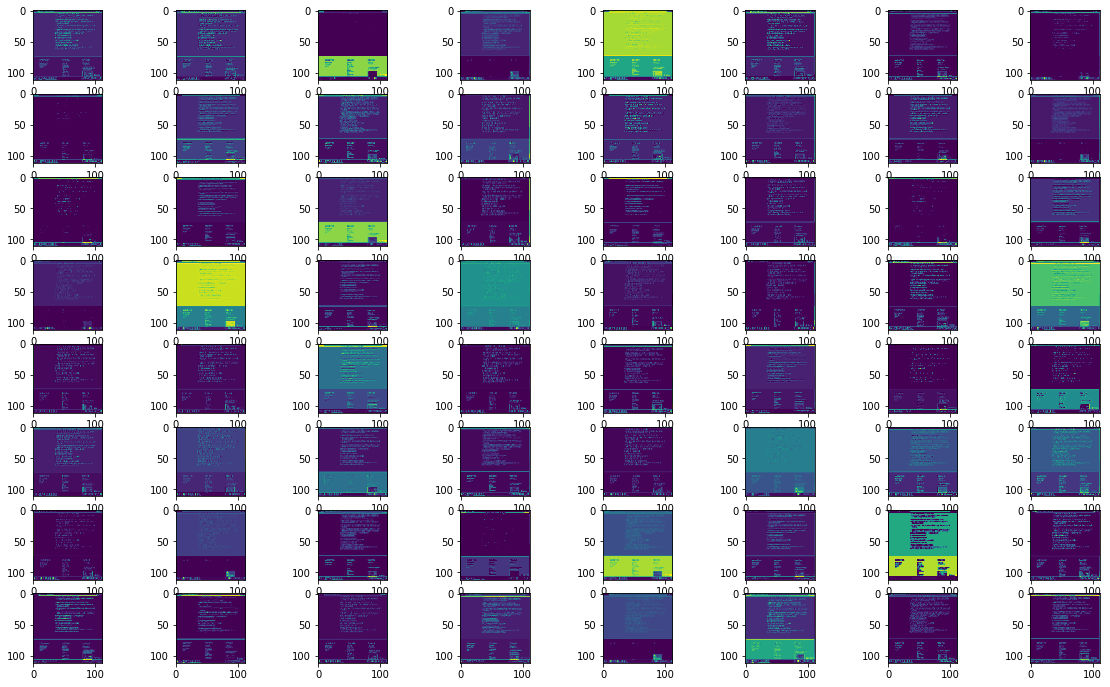

In [60]:
display_activation(activations, 8, 8, 0)


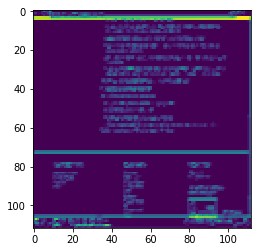

In [52]:
plt.imshow(activations[0, :, :, 63])

In [143]:
def display_activation2(model,a, act_index):
    heat = []
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs[act_index])
    activation = activation_model.predict(a.reshape(1,224,224,3))
    activation_index=0
    col_size = int((len(activation[0, 1, 1, :]))**0.5)
    row_size = col_size
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            heat.append(list(activation[0, :, :, activation_index]))
            activation_index += 1
    return heat

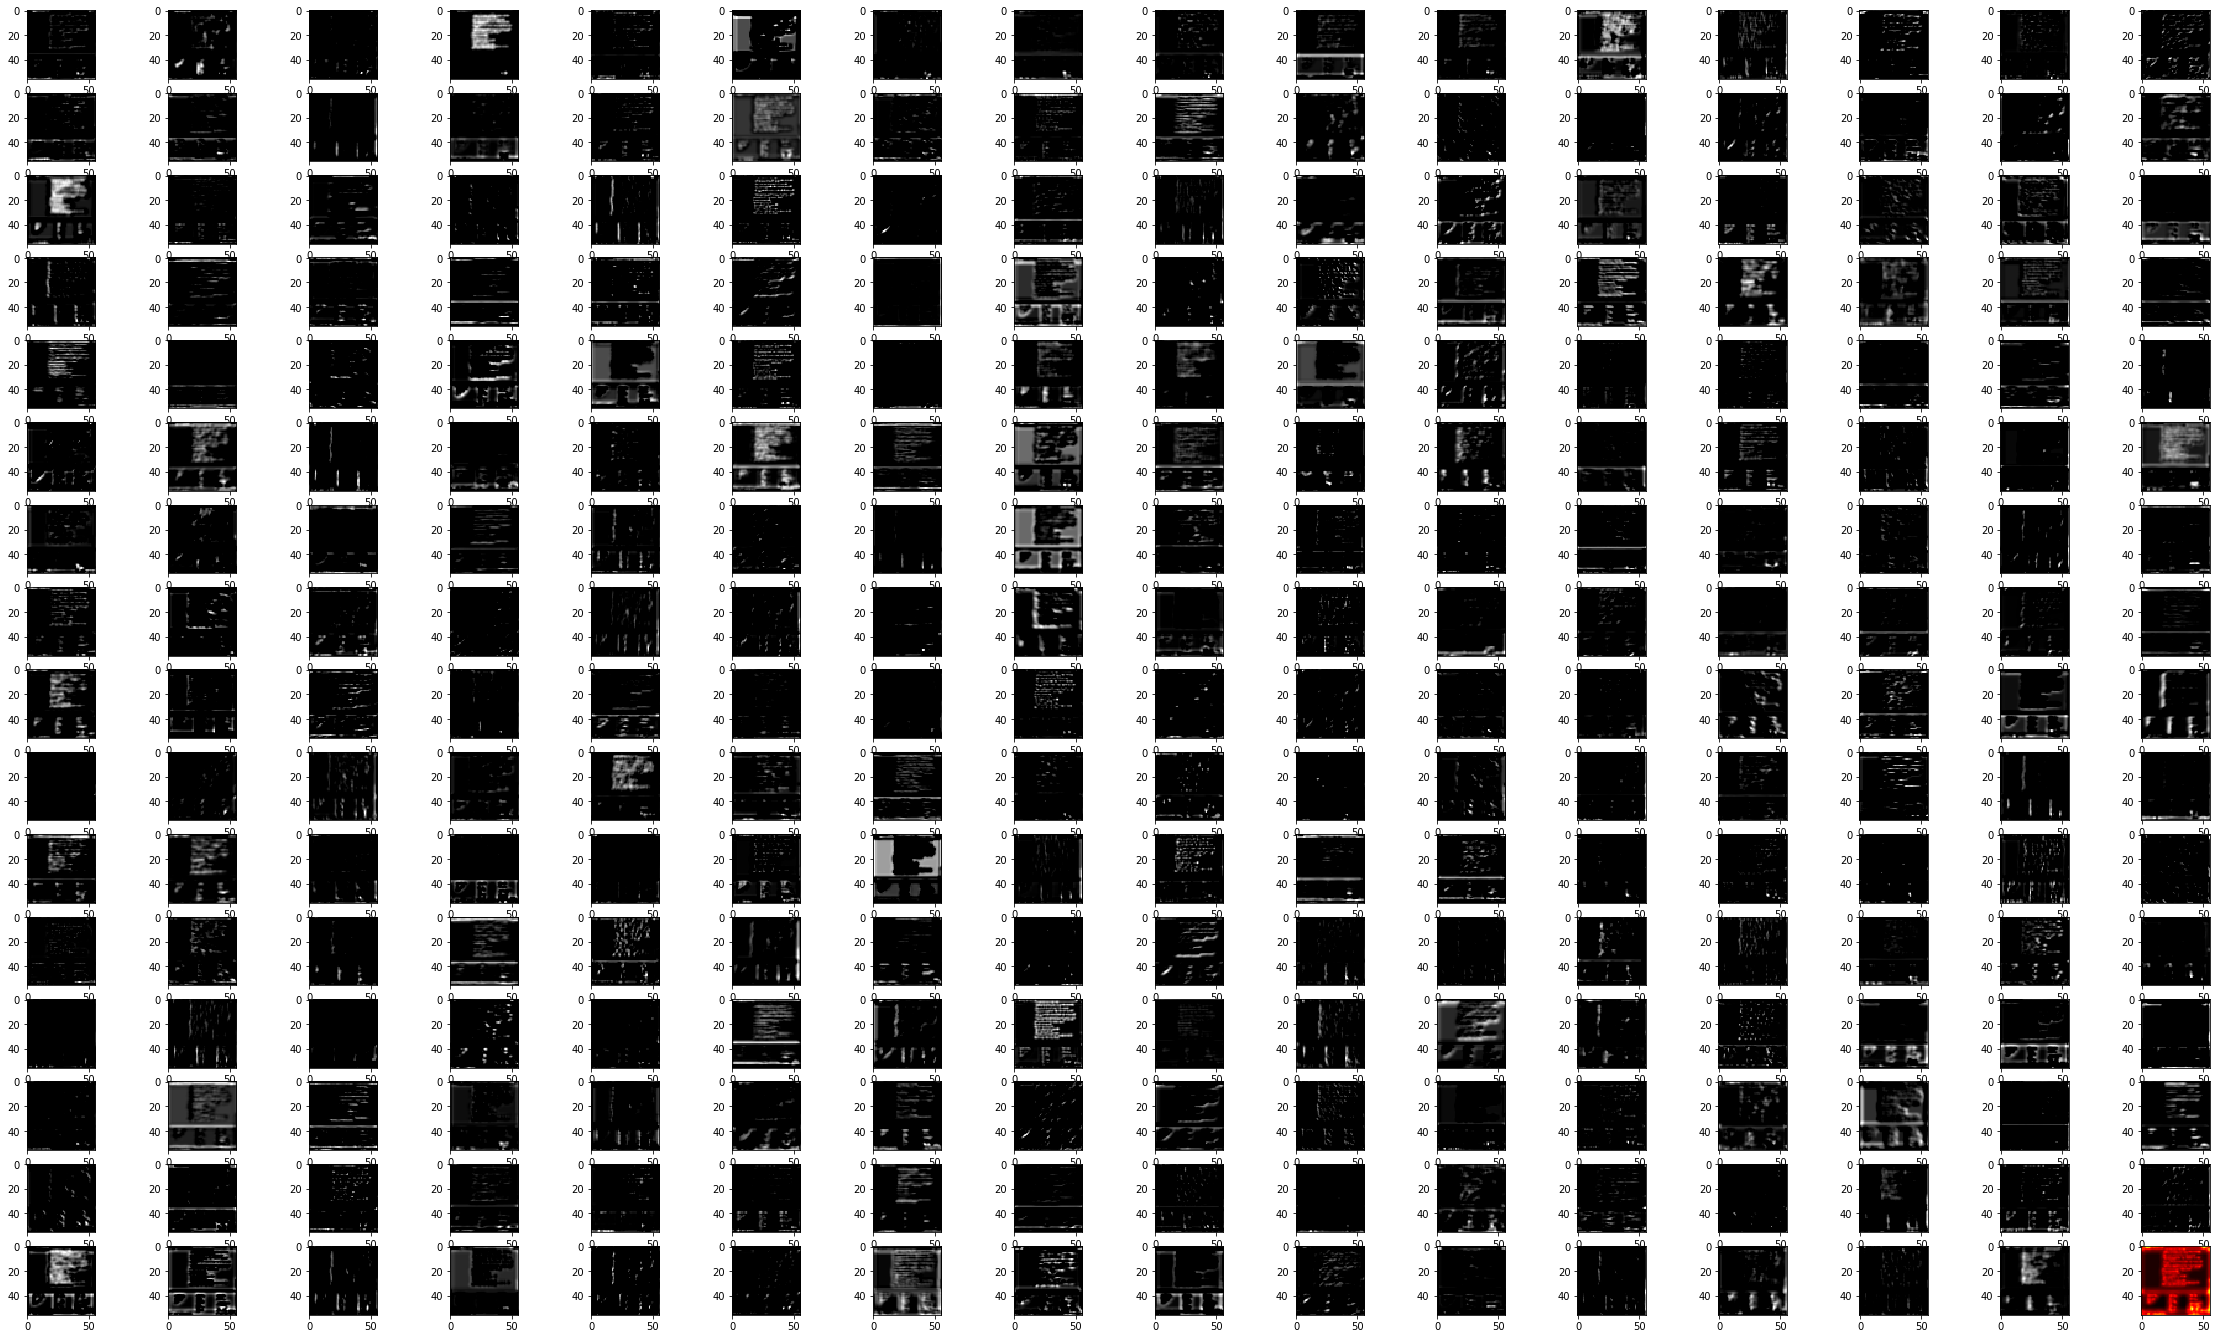

In [136]:
heat = display_activation2(model, 9)


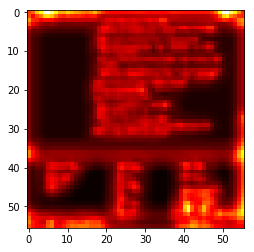

In [137]:
heat_map(heat)

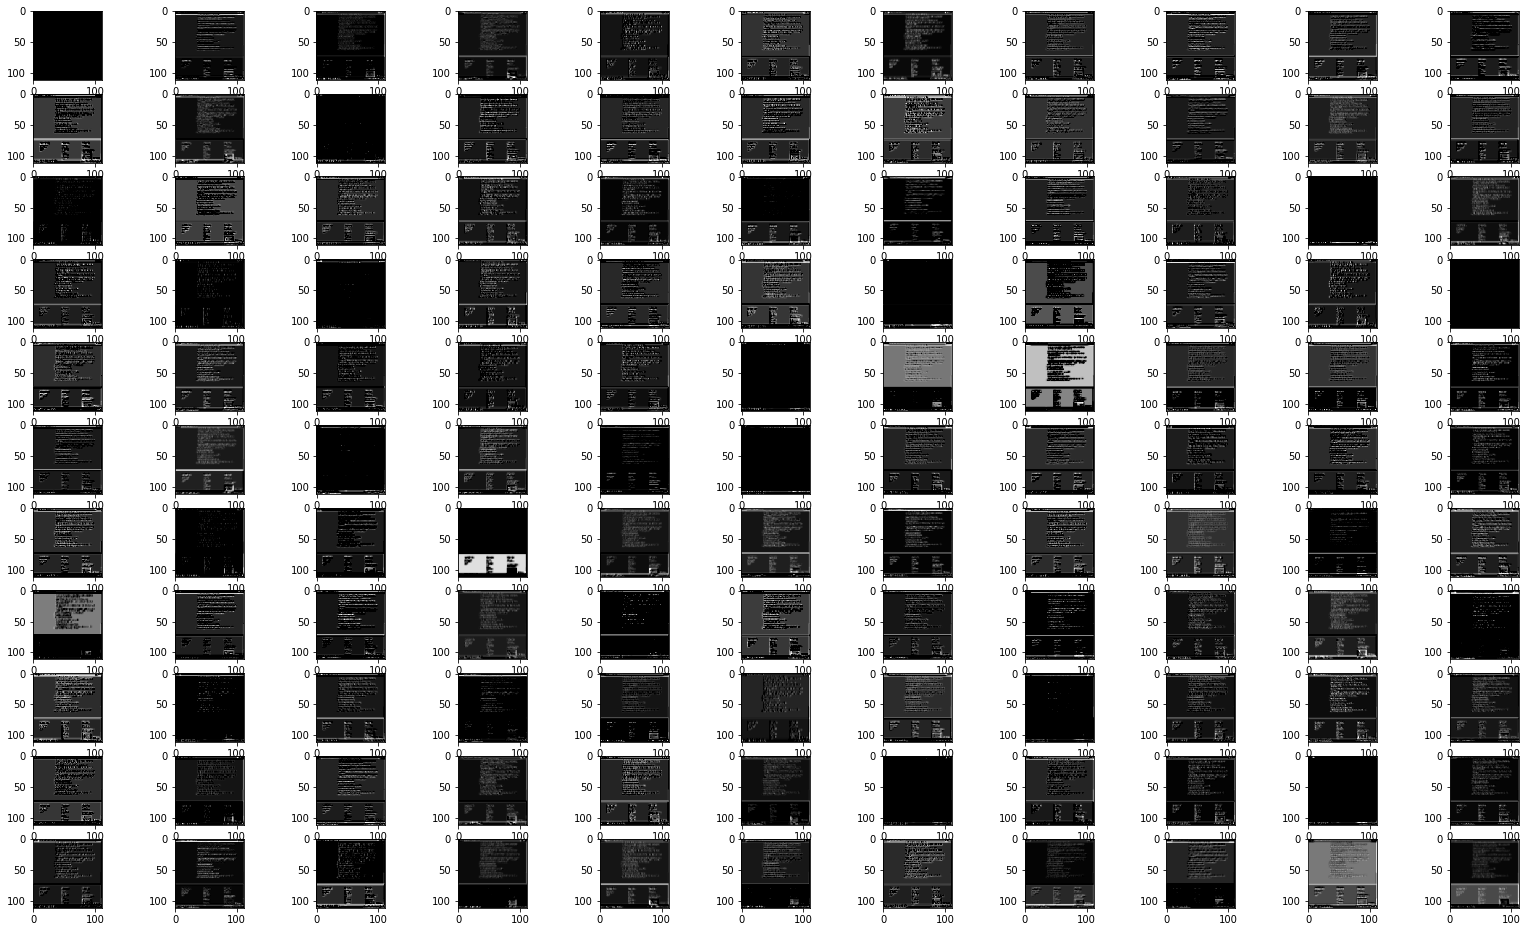

In [80]:
display_activation2(model, 4)

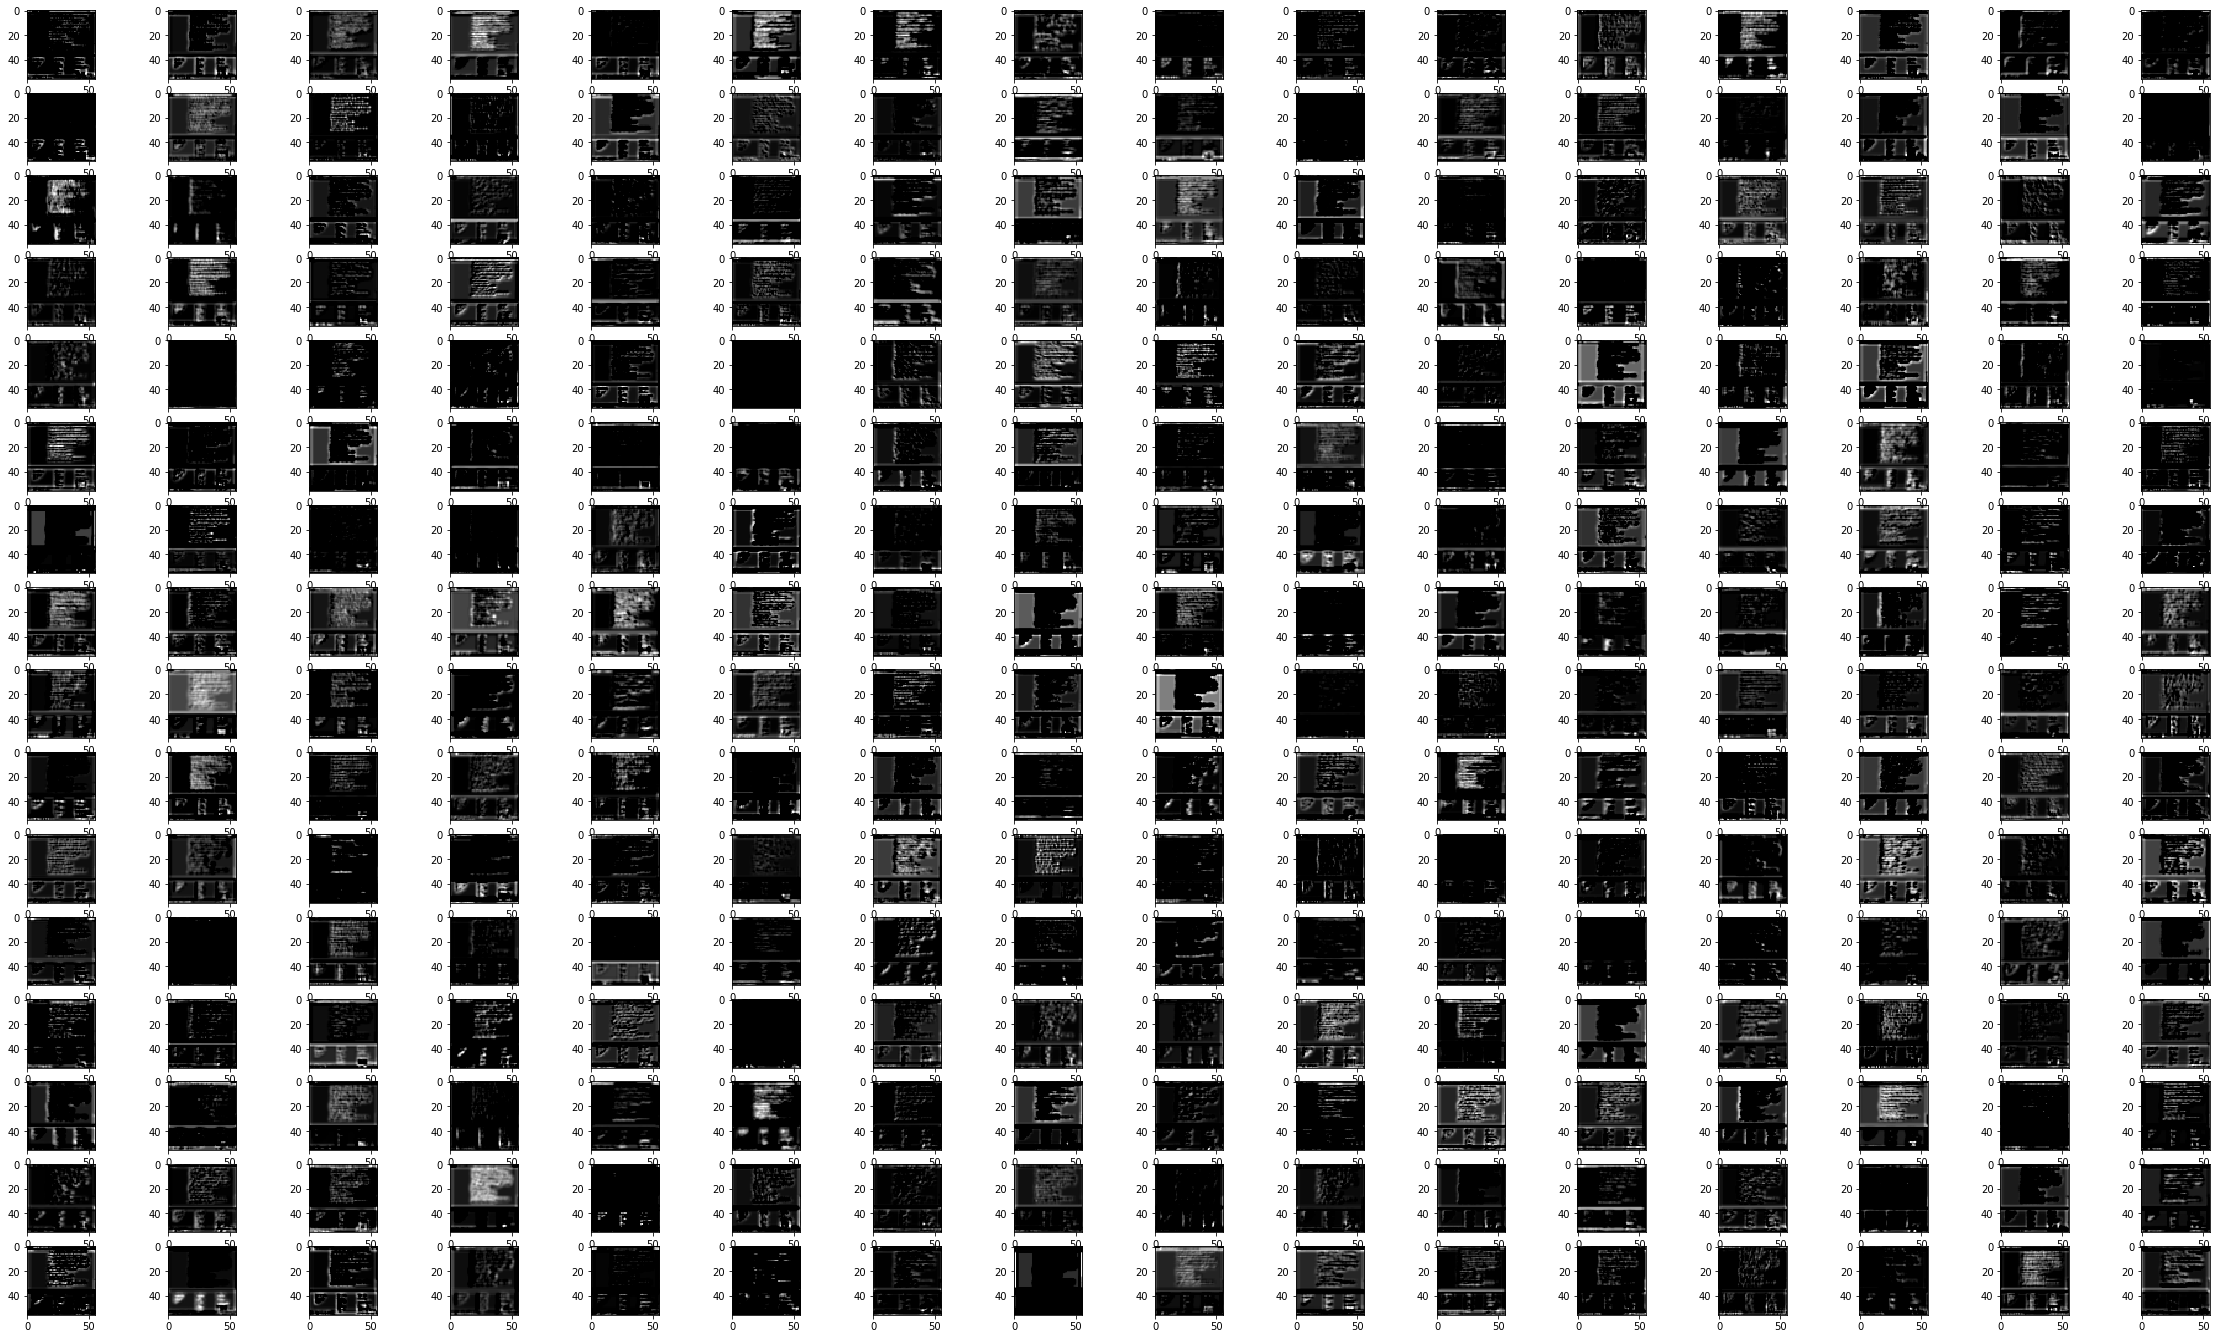

In [81]:
display_activation2(model, 8)

In [89]:
activation[0, :, :, 1]

array([[36.838787  , 49.395992  , 49.16348   , ..., 31.881433  ,
        31.136591  , 21.2211    ],
       [52.392982  , 69.676506  , 69.443474  , ..., 45.0547    ,
        44.295822  , 30.029152  ],
       [52.418976  , 69.40531   , 70.60176   , ..., 45.581535  ,
        44.694073  , 30.095346  ],
       ...,
       [ 4.4118958 ,  3.6482644 ,  6.6406574 , ...,  4.767083  ,
         0.        ,  2.35668   ],
       [ 4.4118958 ,  3.6482644 ,  3.6482644 , ...,  0.07223139,
         2.6119027 ,  2.35668   ],
       [ 3.0743425 ,  2.3903854 ,  2.3903854 , ...,  1.4576606 ,
         2.3903854 ,  1.4825014 ]], dtype=float32)

In [153]:
def heat_map(heat):
    total = np.zeros((len(heat[0]),len(heat[0][0])))
    for im in heat:
        total+=im/np.amax(im)
    heat_img = total/len(heat)
    plt.imshow(total2,cmap='hot', interpolation='nearest')
    return heat_img

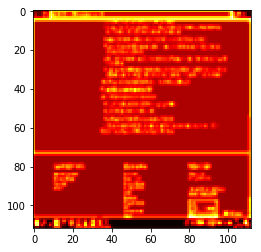

In [154]:
heat_img = heat_map(heat)

In [156]:
np.amax(heat_img)

0.4901974992826581

In [123]:
total2

array([[0.16657175, 0.1448039 , 0.14311607, ..., 0.11545837, 0.08055164,
        0.09254581],
       [0.19598629, 0.2386175 , 0.1421639 , ..., 0.19902393, 0.06469154,
        0.07821135],
       [0.22637965, 0.27953505, 0.15595364, ..., 0.19626351, 0.06543788,
        0.07830887],
       ...,
       [0.42830823, 0.8720092 , 0.85955661, ..., 0.94626792, 0.54171641,
        0.18488281],
       [0.33106142, 0.83474168, 0.87394661, ..., 0.52714884, 0.50857953,
        0.25561519],
       [0.06376238, 0.17439517, 0.19831445, ..., 0.20035207, 0.2831497 ,
        0.14200174]])

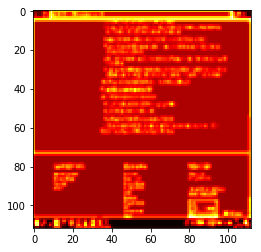

In [126]:
plt.imshow(total2,cmap='hot', interpolation='nearest')

In [116]:
t.shape

(112, 112)

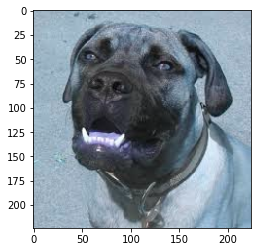

In [206]:
a = load_image("images.jpg")
img = a/np.amax(a)

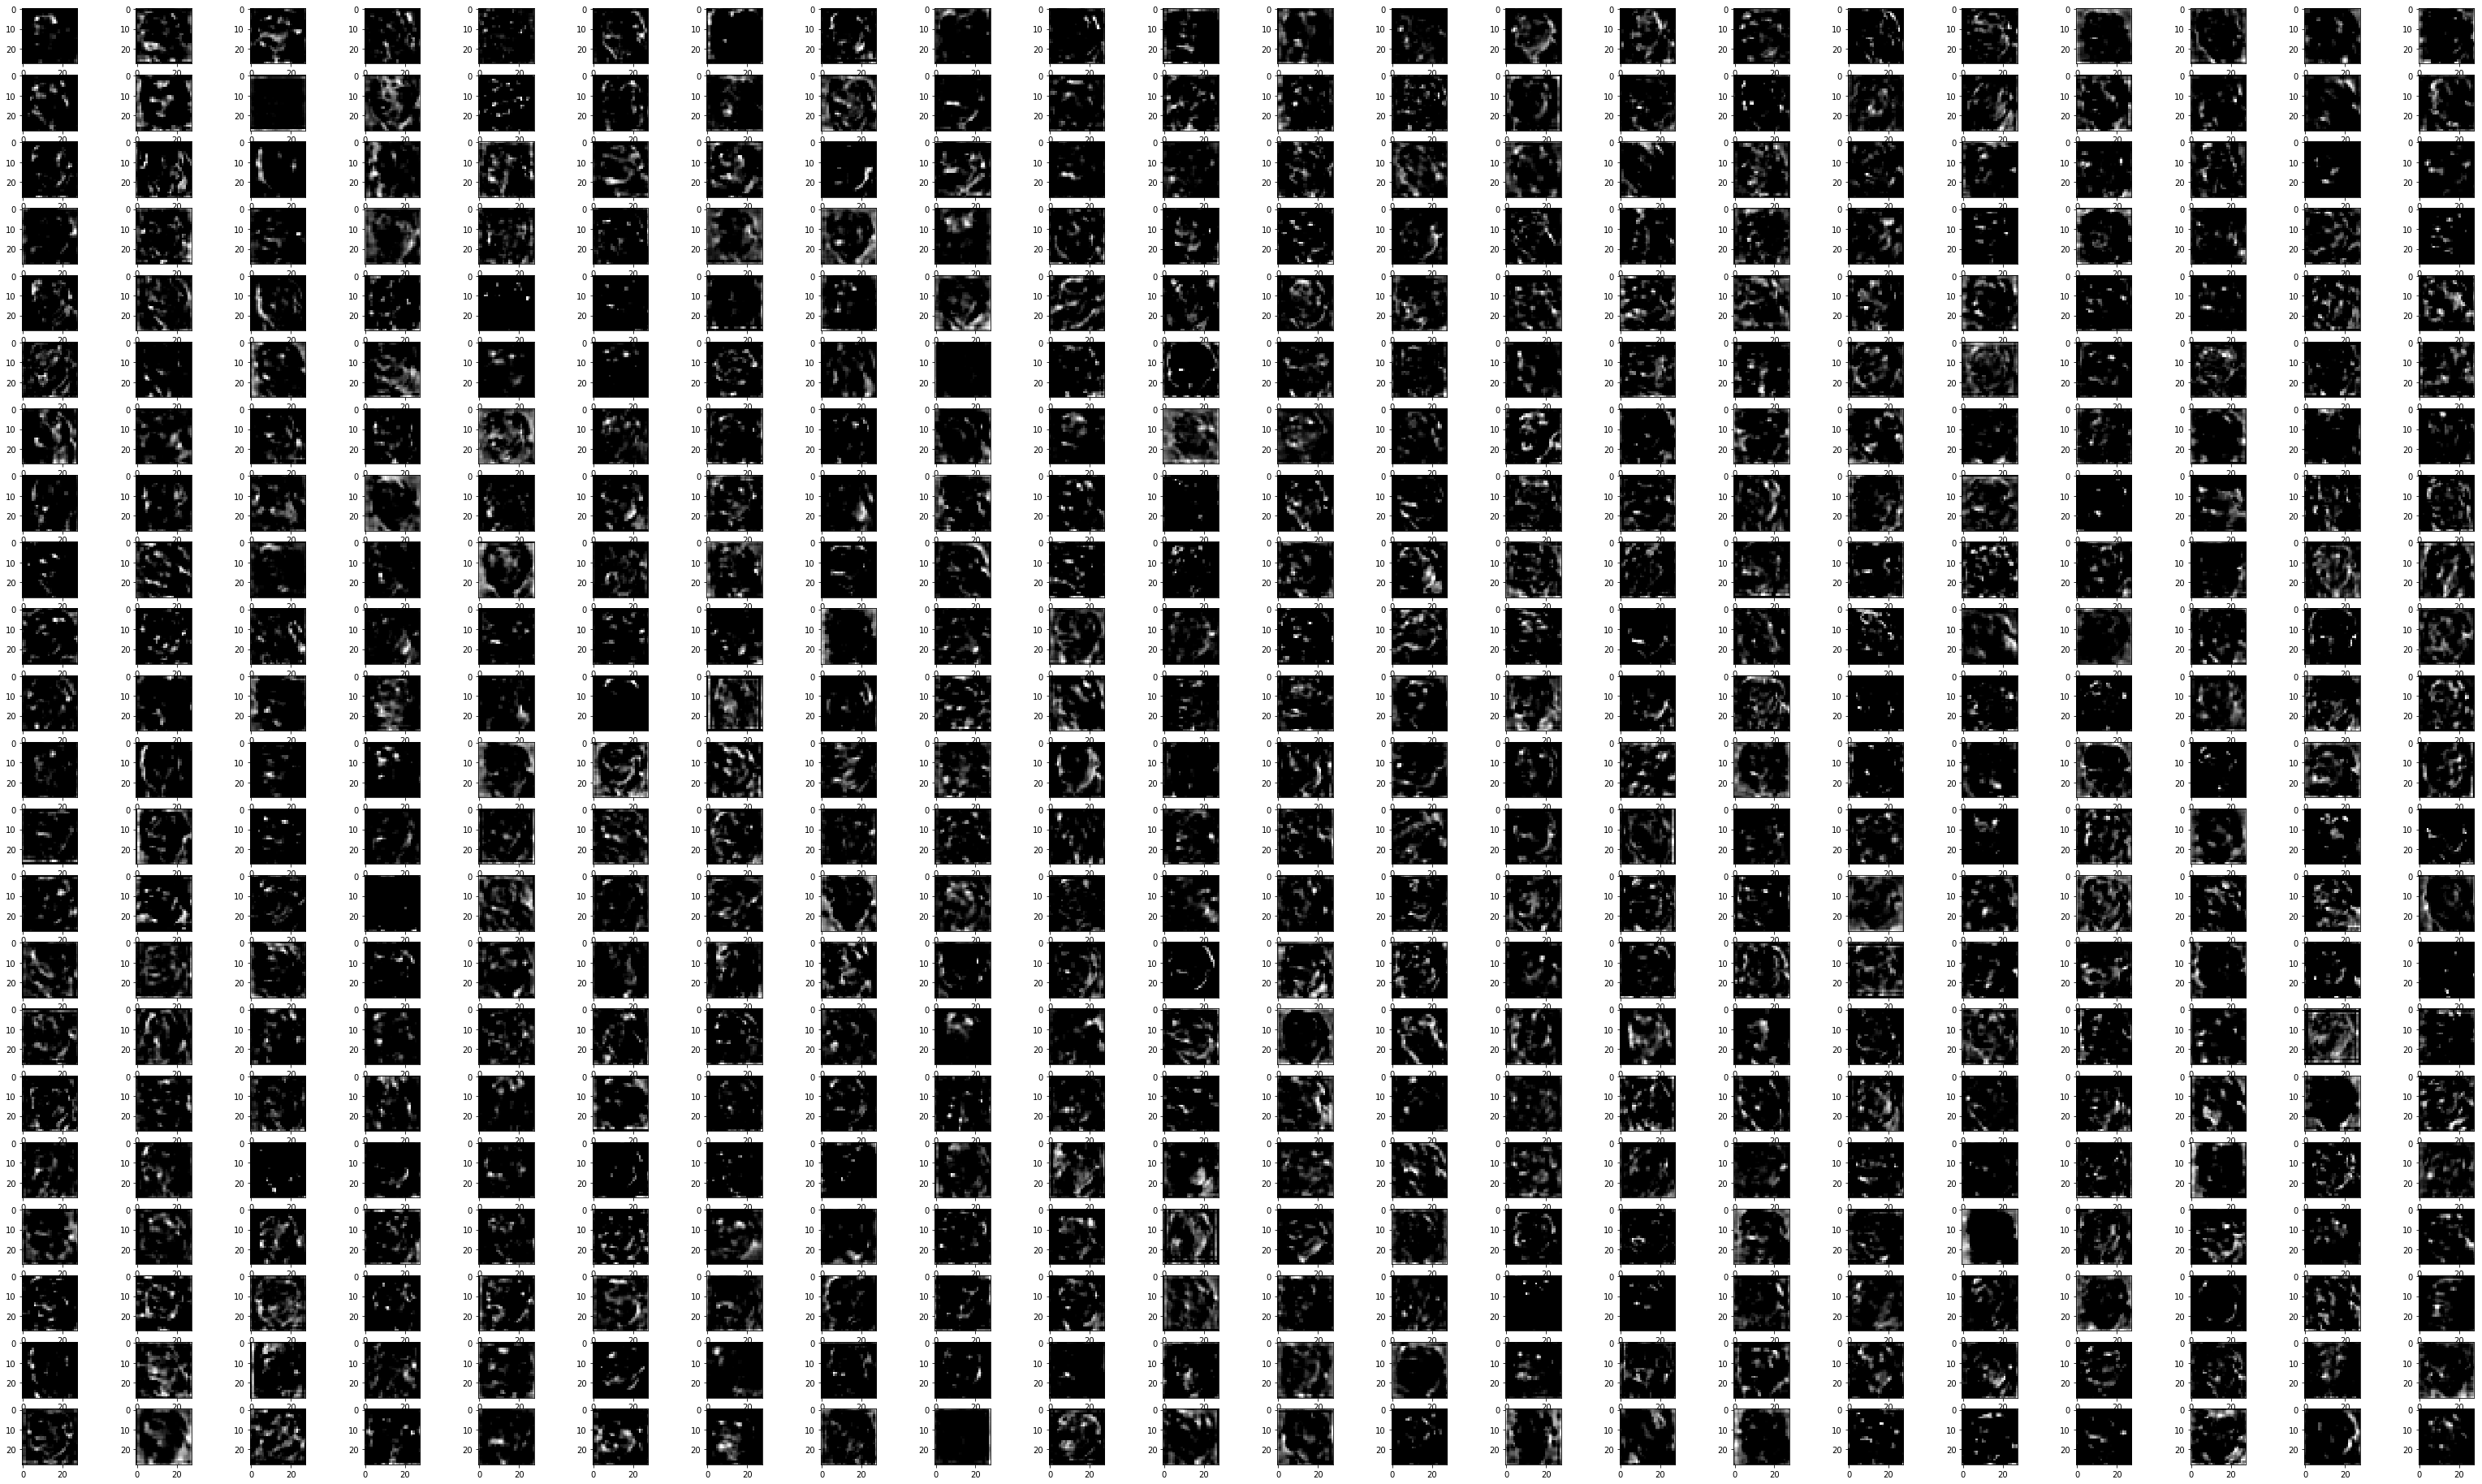

In [208]:
heat = display_activation2(model,a, 12)

array([[0.13591853, 0.15830068, 0.22603074, ..., 0.1022563 , 0.12851634,
        0.18415096],
       [0.10894492, 0.10628673, 0.14013637, ..., 0.06698887, 0.09800607,
        0.14758607],
       [0.10950736, 0.09265753, 0.13591945, ..., 0.07358646, 0.1294616 ,
        0.20330399],
       ...,
       [0.22235382, 0.16287968, 0.19290874, ..., 0.19172668, 0.19297992,
        0.16268831],
       [0.22312937, 0.1694885 , 0.16549357, ..., 0.18209273, 0.20675442,
        0.15486766],
       [0.25061729, 0.23830583, 0.1712318 , ..., 0.14516915, 0.15106438,
        0.13603286]])

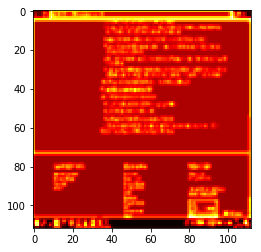

In [203]:
heat_map(heat)

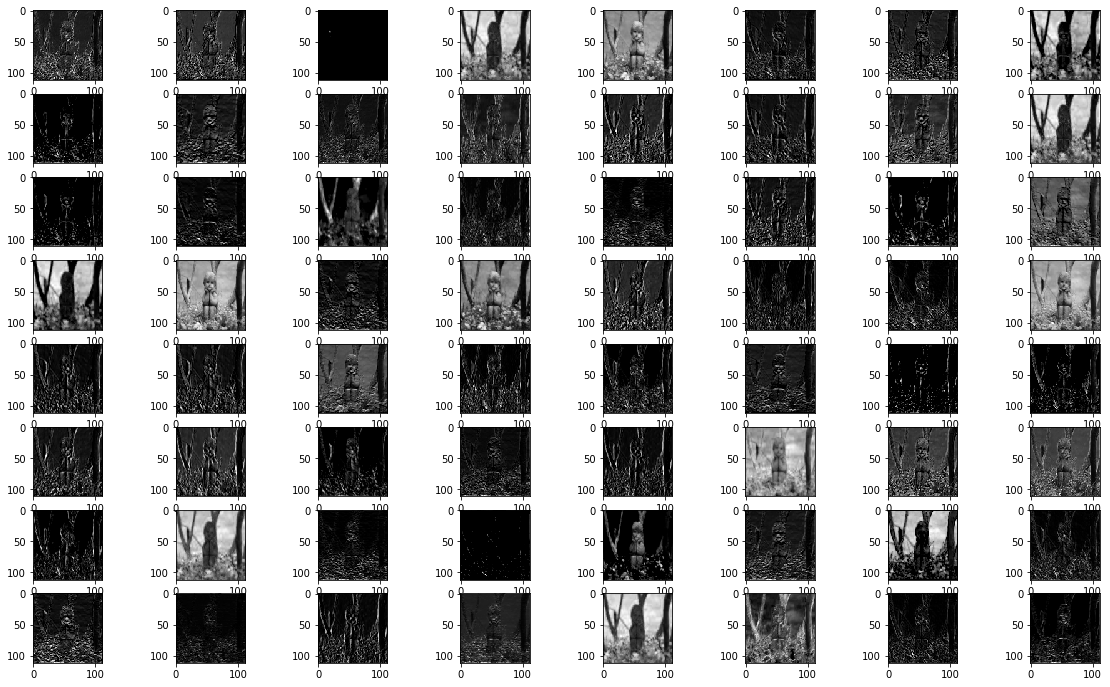

In [146]:
heat = display_activation2(model,a, 3)

In [198]:
def heat_map_ultra(heat,thres):
    total = np.zeros((len(heat[0]),len(heat[0][0])))
    for im in heat:
        img = im/np.amax(im)
        img[img <= thres] = 0
        total+=img
    heat_img = total/len(heat)
    plt.imshow(heat_img,cmap='hot', interpolation='nearest')
    return heat_img


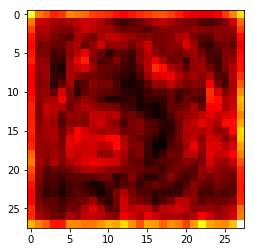

In [209]:
ar = heat_map_ultra(heat,0.0)

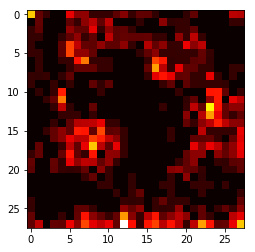

In [210]:
ar = heat_map_ultra(heat,0.9)

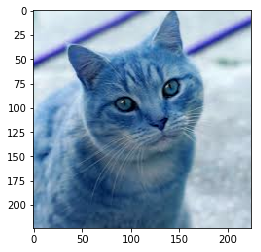

In [212]:
    a = load_image("cat.jpg")
    img = a/np.amax(a)

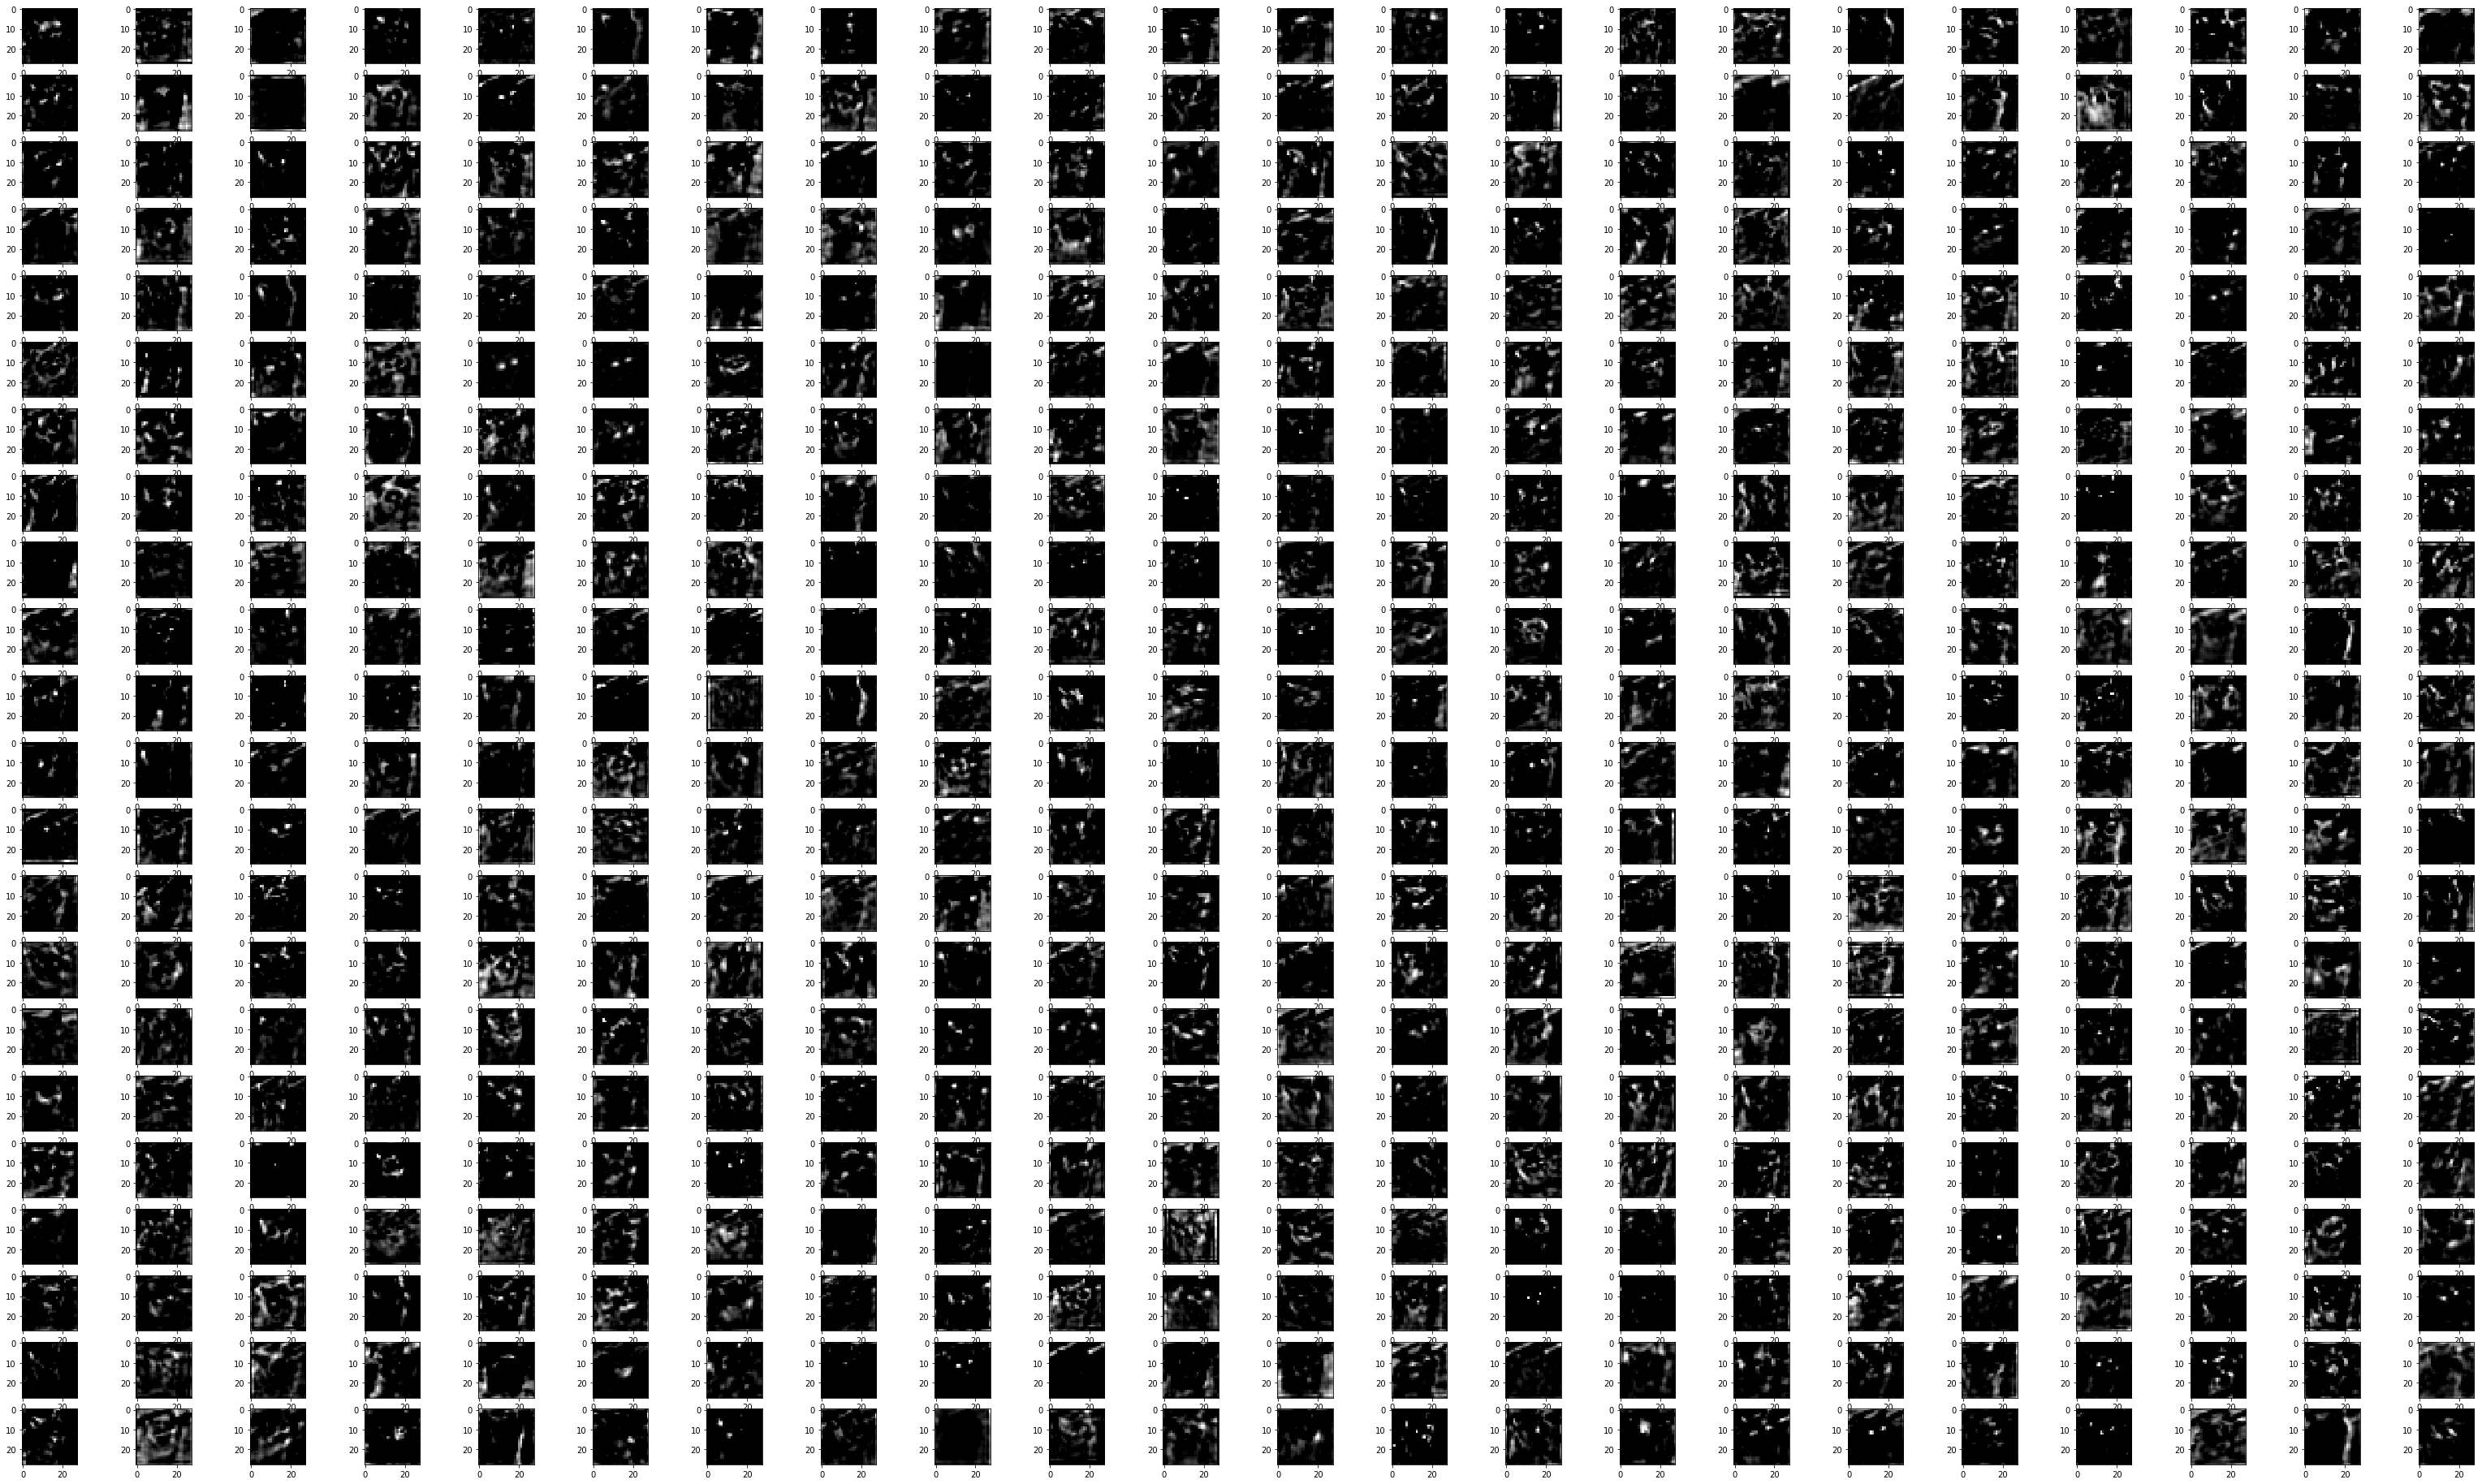

In [213]:
heat = display_activation2(model,a, 12)

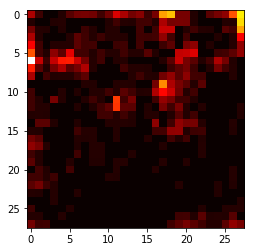

In [214]:
ar = heat_map_ultra(heat,0.9)

In [216]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [217]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(X_valid)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_valid,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");


NameError: name 'X_valid' is not defined

In [ ]:
Visualisation of weigths. 

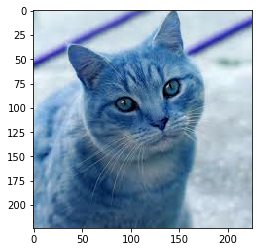

In [3]:
image = cv2.imread('cat.JPG')
plt.imshow(image)

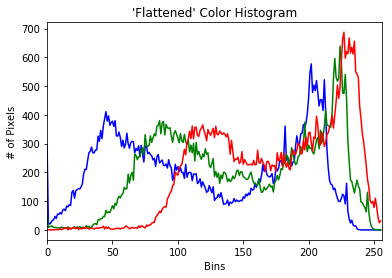

In [4]:
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and
    # concatenate the resulting histograms for each
    # channel
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)

    # plot the histogram
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

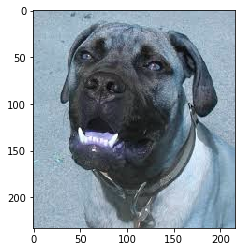

In [145]:
image = cv2.imread('images.JPG')
plt.imshow(image)

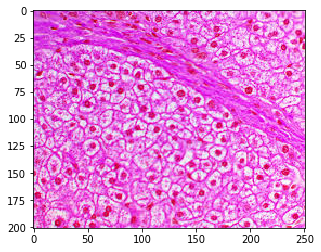

In [142]:
image = cv2.imread('histo.JPG')
plt.imshow(image)

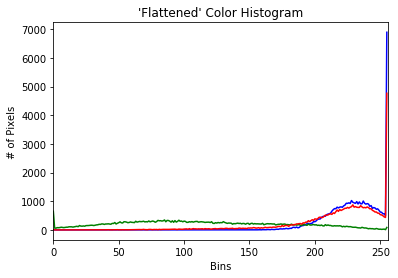

In [143]:
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and
    # concatenate the resulting histograms for each
    # channel
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)

    # plot the histogram
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

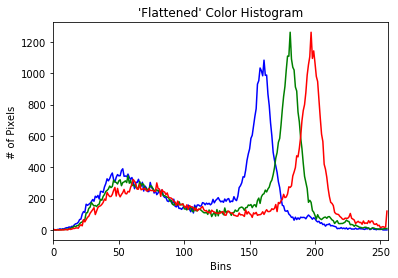

In [87]:
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and
    # concatenate the resulting histograms for each
    # channel
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)

    # plot the histogram
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

In [125]:
import pickle
zippy = pickle.load(open( r"C:\Users\s147057\Documents\BEP\Pickle.p", "rb" ))

In [126]:
l = list(zippy)
import random
random.shuffle(l)
type(l)

list

In [25]:
l

[(array([[[156, 127, 142],
          [150, 119, 144],
          [144, 110, 152],
          ...,
          [ 49,  38,  46],
          [ 48,  37,  45],
          [ 47,  36,  44]],
  
         [[157, 129, 144],
          [150, 120, 145],
          [142, 108, 149],
          ...,
          [ 50,  39,  47],
          [ 49,  38,  46],
          [ 48,  38,  45]],
  
         [[160, 134, 148],
          [150, 122, 146],
          [137, 105, 145],
          ...,
          [ 52,  41,  49],
          [ 52,  41,  49],
          [ 51,  40,  49]],
  
         ...,
  
         [[176, 174, 181],
          [173, 173, 179],
          [171, 171, 177],
          ...,
          [217, 214, 223],
          [203, 201, 209],
          [192, 190, 198]],
  
         [[172, 171, 179],
          [171, 171, 179],
          [170, 171, 179],
          ...,
          [222, 221, 227],
          [217, 216, 223],
          [213, 212, 219]],
  
         [[170, 169, 178],
          [169, 170, 178],
          [170, 171, 179

In [127]:
x,y = zip(*l)

In [120]:
x[0].max()

255

In [28]:
len(y)

601

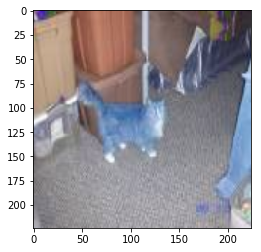

In [118]:
plt.imshow(x[0])

In [56]:
zero = np.ndarray(shape=(224,224,3), dtype=float)
for im in x:
    im = im/len(x)
    
    zero +=im
zero = zero.astype(int)    


In [57]:
zero[0][0]

array([101, 109, 114])

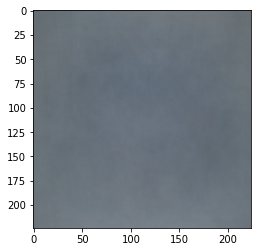

In [58]:
plt.imshow(zero)

In [3]:

def plot_color_his(x):
    colors = ("b", "g", "r")
    plt.figure()
    plt.title("'Flattened' Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    features = []

    # loop over the image channels
    r = np.ndarray(shape=(256, 1), dtype=float)
    g = np.ndarray(shape=(256, 1), dtype=float)
    b = np.ndarray(shape=(256, 1), dtype=float)
    for im in x:
        chans = cv2.split(im)
        for (chan, color) in zip(chans, colors):
            # create a histogram for the current channel and
            # concatenate the resulting histograms for each
            # channel
            hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
            features.extend(hist)
            if color == 'r':
                r+=hist
            elif color == 'g':
                g+=hist
            else:
                b+=hist

#     r = (r/len(x)).astype(int) 
#     b = (b/len(x)).astype(int) 
#     g = (g/len(x)).astype(int)


    for color,hist in zip(colors,[b,g,r]):
        # plot the histogram
        plt.plot(hist, color = color)
        plt.xlim([0, 256])

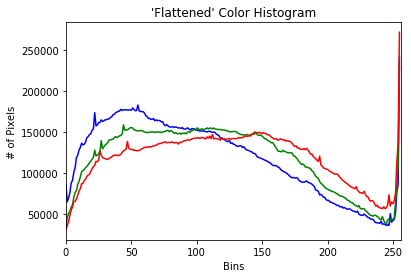

In [141]:
plot_color_his(x[:])

In [107]:
image = cv2.imread('images.JPG')

In [108]:
image2 = cv2.imread('cat.JPG')

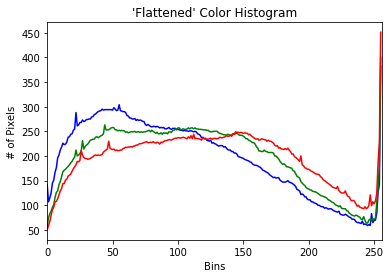

In [122]:
plot_color_his(x)

In [146]:
from skimage.feature import greycomatrix, greycoprops

In [154]:
import numpy as np

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

glcm = greycomatrix(rgb2gray(image).astype(int)  , [5], [0], 256, symmetric=True, normed=True)

C:\Users\s147057\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\feature\texture.py:109: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(image.dtype, np.float):


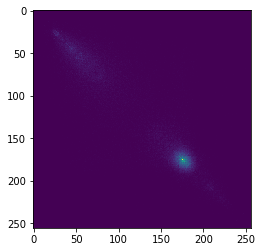

In [162]:
plt.imshow(glcm.reshape((256, 256)))

# http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html 

In [5]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb

import numpy as np
import matplotlib.pyplot as plt

def make_texture_his(image):
    METHOD = 'uniform'
    radius = 3
    n_point = 8*radius

    def overlay_labels(image, lbp, labels):
        mask = np.logical_or.reduce([lbp == each for each in labels])
        return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


    def highlight_bars(bars, indexes,c):
        for i in indexes:
            bars[i].set_facecolor(c)


#     image = cv2.imread(file)
    image = rgb2gray(image).astype(int)
    lbp = local_binary_pattern(image, n_points, radius, METHOD)


    def hist(ax, lbp):
        n_bins = int(lbp.max() + 1)
        return ax.hist(lbp.ravel(), normed=True, bins=n_bins, range=(0, n_bins),
                       facecolor='0.5', label = ('','edge', 'flat', 'corner'))


    # plot histograms of LBP of textures
    fig, (ax_img, ax) = plt.subplots(nrows=2, ncols=1, figsize=(9, 6))
    plt.gray()

    titles = ('edge', 'flat', 'corner')
    w = width = radius - 1
    edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
    flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
    i_14 = n_points // 4            # 1/4th of the histogram
    i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
    corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                     list(range(i_34 - w, i_34 + w + 1)))

    label_sets = (edge_labels, flat_labels, corner_labels)


    ax_img.imshow(image)
    
    color=['b', 'r', 'g']
    
#     for ax, labels, name,c in zip(ax_hist, label_sets, titles,color):

    counts, _, bars = hist(ax, lbp)
    for c,indexes in zip(colors,label_sets):
#         highlight_bars(bars, labels,c)
        for i in indexes:
            bars[i].set_facecolor(c)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title('Flat                   Corner                      Edge                   Corner                     Flat')

    ax.set_ylabel('Percentage')

    ax_img.axis('off')

C:\Users\s147057\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


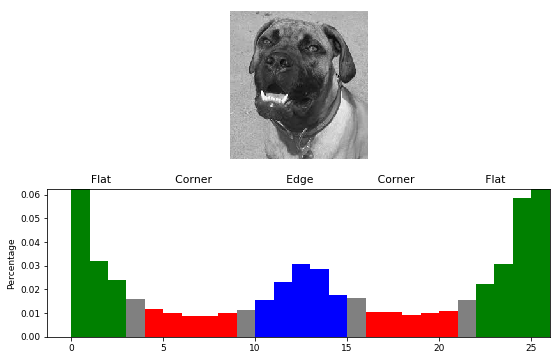

In [236]:
make_texture_his('images.JPG')

C:\Users\s147057\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


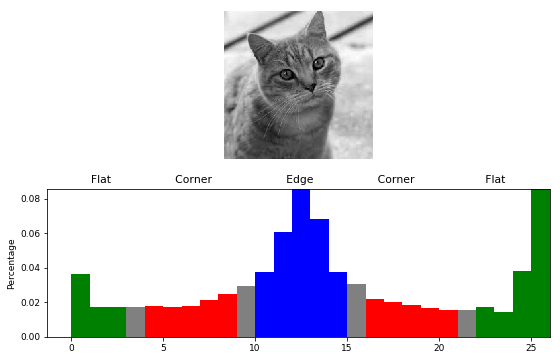

In [347]:
make_texture_his('cat.JPG')

In [190]:
help(ax.legend())

No handles with labels found to put in legend.


Help on Legend in module matplotlib.legend object:

class Legend(matplotlib.artist.Artist)
 |  Place a legend on the axes at location loc.
 |  
 |  Method resolution order:
 |      Legend
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, parent, handles, labels, loc=None, numpoints=None, markerscale=None, markerfirst=True, scatterpoints=None, scatteryoffsets=None, prop=None, fontsize=None, borderpad=None, labelspacing=None, handlelength=None, handleheight=None, handletextpad=None, borderaxespad=None, columnspacing=None, ncol=1, mode=None, fancybox=None, shadow=None, title=None, framealpha=None, edgecolor=None, facecolor=None, bbox_to_anchor=None, bbox_transform=None, frameon=None, handler_map=None)
 |      Parameters
 |      ----------
 |      parent : `.Axes` or `.Figure`
 |          The artist that contains the legend.
 |      
 |      handles : sequence of `.Artist`
 |          A list of Artists (lines, patches) to be add

In [278]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [299]:
input_img = cv2.imread('cat.JPG')
input_img = cv2.resize(input_img,(224, 224))
input_img.shape
img_width = 224
img_height = img_width

In [367]:
from keras import applications
from keras import backend as K
# build the VGG16 network
# model = applications.VGG16(include_top=False,
#                            weights='imagenet')

def vis_weights(filter_size, model, layer_name = 'block1_conv1',filter_index = 0):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])

    input_img = model.input
    img_width = filter_size
    img_height = img_width
    
    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :, :])
    else:
        loss = K.mean(layer_output[:, :, :, filter_index])

    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    def nomralize(x):
        return x/(K.sqrt(K.mean(K.square(x))) + K.epsilon())

    # normalization trick: we normalize the gradient
    grads = nomralize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    import numpy as np

    step= 1.

    # we start from a gray image with some noise
    if K.image_data_format() == 'channels_first':
        input_img_data = np.random.random((1, 3, img_width, img_height)) 
    else:
        input_img_data = np.random.random((1, img_width, img_height, 3))
    input_img_data = (input_img_data)* 20 + 128.


    # run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    from scipy.misc import imsave

    # util function to convert a tensor into a valid image
    def deprocess_image(x):
        # normalize tensor: center on 0., ensure std is 0.1
        x -= x.mean()
        x /= (x.std() + 1e-5)
        x *= 0.1

        # clip to [0, 1]
        x += 0.5
        x = np.clip(x, 0, 1)

        # convert to RGB array
        x *= 255
    #     x = x.transpose((1, 2, 0))
        x = np.clip(x, 0, 255).astype('uint8')
        return x

    img = input_img_data[0]
    img = deprocess_image(img)
    return img

In [368]:
img = vis_weights(80,layer_name = 'block3_conv1',filter_index = 25)
img.shape

TypeError: vis_weights() missing 1 required positional argument: 'model'

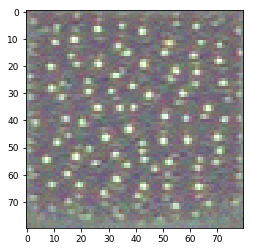

In [345]:
plt.imshow(img)

In [364]:
def display_activation(layer_name = 'block1_conv1',model= applications.VGG16(include_top=False,weights='imagenet')):
    layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
    col_size = int(int(((layer_dict[layer_name].output.shape[3])))**0.5)
    row_size = col_size
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    activation_index = 0
    for row in range(0,row_size):
        for col in range(0,col_size):
            img = vis_weights(50,model,layer_name,filter_index = activation_index)
            ax[row][col].imshow(img)
            activation_index += 1

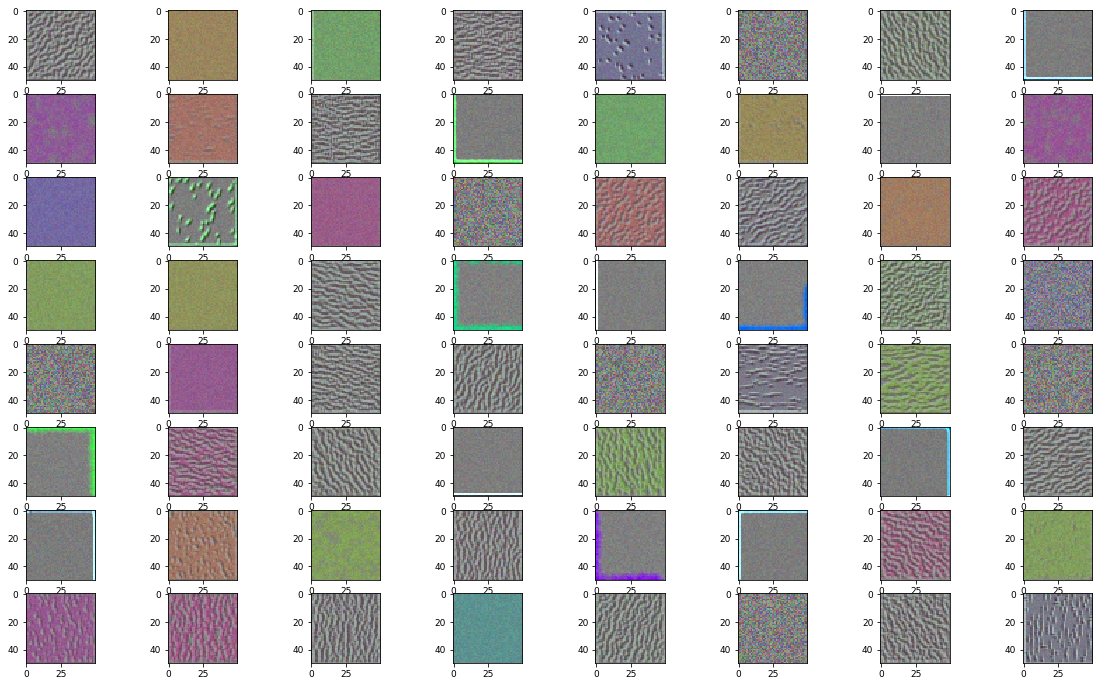

In [369]:
display_activation()